## Analizing the Vanarabulity fixed commits dates and first release date that has Fix in it.

## Goals

- To Extract dates from SHDS and githubs. <br>
- Exploring the Data.<br>
        -Getting mean, median , mode, SD of the days( the number of days between the commit and release )<br>
        - Applying a Distribution Model ( Normal Distribution )<br>
        - Other tests
- Apply A ML Model.

In [4]:
import pandas as pa
import json
import datetime as dt
import glob

In [6]:
d = pa.to_datetime('Apr 18, 2009')

## Loading the software nearest release data which has fix in it.

The date is being retreaved from two named(data2.txt) file which contains hash's of the commit and rel_date in theam.


In [35]:
d = dict()
with open('data2.txt','r') as f:
    for line in f:
        if len(line)>25:
#             print(line)
            if len(line.strip().split('[<'))>1:
                d[line.strip().split('[<')[0].split('\'')[1][-40:]] = line.strip().split('[<')[1].split('">')[1].split('<')[0]
        

('http://github.com/bratsche/pango/commit/4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e', '[<relative-time class="no-wrap" datetime="2009-04-18T19:04:41Z">Apr 18, 2009</relative-time>]') 

('http://github.com/alandekok/freeradius-server/commit/860cad9e02ba344edb0038419e415fe05a9a01f4', '[]') 

('http://github.com/macournoyer/thin/commit/7bd027914c5ffd36bb408ef47dc749de3b6e063a', '[<relative-time class="no-wrap" datetime="2009-09-06T02:49:07Z">Sep 6, 2009</relative-time>]') 

('http://github.com/gisle/html-parser/commit/b9aae1e43eb2c8e989510187cff0ba3e996f9a4c', '[<relative-time class="no-wrap" datetime="2009-10-22T20:08:15Z">Oct 22, 2009</relative-time>]') 

('http://github.com/rails/rails/commit/bfe032858077bb2946abe25e95e485ba6da86bd5', '[<relative-time class="no-wrap" datetime="2010-05-24T10:48:52Z">May 24, 2010</relative-time>, <relative-time class="no-wrap" datetime="2010-05-24T10:53:59Z">May 24, 2010</relative-time>, <relative-time class="no-wrap" datetime="2010-05-24T11:33:14Z">May 2

('http://github.com/krb5/krb5/commit/08c642c09c38a9c6454ab43a9b53b2a89b9eef99', '[<relative-time class="no-wrap" datetime="2019-04-03T15:35:25Z">Apr 3, 2019</relative-time>]') 

('http://github.com/krb5/krb5/commit/93b4a6306a0026cf1cc31ac4bd8a49ba5d034ba7', '[<relative-time class="no-wrap" datetime="2019-04-03T15:35:25Z">Apr 3, 2019</relative-time>]') 

('http://github.com/php/php-src/commit/28a6ed9f9a36b9c517e4a8a429baf4dd382fc5d5?w=1', None) 

('http://github.com/torvalds/linux/commit/54d83fc74aa9ec72794373cb47432c5f7fb1a309', '[<relative-time class="no-wrap" datetime="2016-04-03T14:09:53Z">Apr 3, 2016</relative-time>]') 

('http://github.com/torvalds/linux/commit/d157bd761585605b7882935ffb86286919f62ea1', '[<relative-time class="no-wrap" datetime="2016-03-26T23:03:44Z">Mar 26, 2016</relative-time>]') 

('http://github.com/torvalds/linux/commit/4e9a0b05257f29cf4b75f3209243ed71614d062e', '[<relative-time class="no-wrap" datetime="2016-04-11T00:58:36Z">Apr 11, 2016</relative-time>]') 


In [23]:
# d[line.strip().split('[<')[0].split('\'')[1][-40:]] = line.strip().split('[<')[1].split('">')[1].split('<')[0]

'Jan 12, 2007'

In [45]:
df =pa.DataFrame({'index':list(d.keys()),'date':list(d.values())})

In [46]:
df['date'] = pa.to_datetime(df['date'])

In [47]:
df.columns = ['hash','rel_date']

In [39]:
df.to_csv('data2.csv')

In [48]:
df

,hash,rel_date
0,4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e,2009-04-18
1,7bd027914c5ffd36bb408ef47dc749de3b6e063a,2009-09-06
2,b9aae1e43eb2c8e989510187cff0ba3e996f9a4c,2009-10-22
3,bfe032858077bb2946abe25e95e485ba6da86bd5,2010-05-24
4,2abdf14620f146857dc8e3ffd2b6a754884c331d,2010-04-23
...,...,...
1628,863d37ea66d5c960db08d6f4a2cbd2518f0f80d1,2016-11-24
1629,6045de69c7dedcba3eadf7c4bba424b19c81d00d,2016-11-24
1630,b2af4e8868726a040234de113436c6e4f6372d17,2016-11-22
1631,a16ffc86eca15fca9e40607d41de3cea9cf868f1,2016-12-14


## Loading NVD dataset

In [44]:
file = '../../data/nvd-hashs/'
allcves = glob.glob(file+'*.csv')
allcves = glob.glob(file+'*.csv')
l = []
for filename in allcves:
    df = pa.read_csv(filename)
    l.append(df)
data = pa.concat(l, ignore_index=True)

## Merging NVD and Release datasets on commit Hashs

In [49]:
mg = pa.merge(data,df,on='hash')

In [50]:
mg

,cveid,year,hash,desc,link,publishedDate,rel_date
0,1145,2009.0,4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e,Integer overflow in the pango_glyph_string_set...,http://github.com/bratsche/pango/commit/4de30e...,2009-05-11T15:30Z,2009-04-18
1,3177,2009.0,7bd027914c5ffd36bb408ef47dc749de3b6e063a,lib/thin/connection.rb in Thin web server befo...,http://github.com/macournoyer/thin/commit/7bd0...,2009-09-22T10:30Z,2009-09-06
2,3513,2009.0,b9aae1e43eb2c8e989510187cff0ba3e996f9a4c,The decode_entities function in util.c in HTML...,http://github.com/gisle/html-parser/commit/b9a...,2009-10-29T14:30Z,2009-10-22
3,4070,2009.0,bfe032858077bb2946abe25e95e485ba6da86bd5,Cross-site scripting (XSS) vulnerability in th...,http://github.com/rails/rails/commit/bfe032858...,2009-12-07T17:30Z,2010-05-24
4,4956,2009.0,2abdf14620f146857dc8e3ffd2b6a754884c331d,Cross-site scripting (XSS) vulnerability in ZM...,http://github.com/zopefoundation/Zope/commit/2...,2017-08-07T17:29Z,2010-04-23
...,...,...,...,...,...,...,...
2389,10116,2016.0,b2af4e8868726a040234de113436c6e4f6372d17,The unserialize implementation in ext/standard...,http://github.com/php/php-src/commit/b2af4e886...,2017-01-04T20:59Z,2016-11-22
2390,10147,2016.0,a16ffc86eca15fca9e40607d41de3cea9cf868f1,The backtrack compilation code in the Irregex ...,http://github.com/ashinn/irregex/commit/a16ffc...,2017-04-21T20:59Z,2016-12-14
2391,10127,2016.0,a16ffc86eca15fca9e40607d41de3cea9cf868f1,The backtrack compilation code in the Irregex ...,http://github.com/ashinn/irregex/commit/a16ffc...,2017-04-21T20:59Z,2016-12-14
2392,10157,2016.0,6d7e13da0f998820800ecb3fe9ccee4189aefb54,redirect() in bottle.py in bottle 0.12.10 does...,http://github.com/bottlepy/bottle/commit/6d7e1...,2016-12-16T09:59Z,2018-12-26


In [1]:
link = 'http://github.com/bratsche/pango/commit/4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e'

## Getting dates when the commits where pushed to fix the Vanarabulity.

In [ ]:
relative-time

In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from lxml import html

url = link
page = html.fromstring(urlopen(url).read())
soup = BeautifulSoup(urlopen(url).read(), 'html.parser')

In [8]:
from urllib.request import urlopen
lt = list()
ct=0
for link in links:
#     print('inside')
    if type(link) != str:
        continue
    url = link[:7]+'api.'+link[7:18]+'repos/'+link[18:-41]+'s'+link[-41:]+'?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16'
    try:
        s = urlopen(url).read().decode()
    except:
        
        print(url)
        continue
        lt.append((url[-40:],'nan'))
    l = json.loads(s.strip())
    lt.append((url[-40:],l['commit']['author']['date']))
    ct+=1
    print(ct)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
http://api.github.com/repos/sub.com/ZF-Commons/ZfcUser/commit/baf0e460?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
26
27
http://api.github.com/repos/martsinpitt/python-dbusmock/commit/4e7d0df9093?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
28
29
30
31
32
33
34
35
36
http://api.github.com/repos/evilpacket/marked/commits/3c191144939107c45a7fa11ab6cb88be6694a1ba?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
37
38
39
40
41
42
43
44
45
http://api.github.com/repos/centreon/centreon/commit/668a928f34dc0f67723d3db138c042eb7f979sf28#diff-f69d4a3d3d177d024c22419357c1f4f4?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/centreon/centreon/commit/a78c60aad6fd5af9b51a6d5de5d65560ea37as98a#diff-27550b563fa8d660b64bca871a219cb1?client_id=fab412aea9ded

http://api.github.com/repos/LimeSurvey/LimeSurvey/commit/5870fd1037058bc4e43cccf893b576c72293371es#diff-d539f3f8185667ee48db78e1bf65a3b4R57?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/LimeSurvey/LimeSurvey/commit/5870fd1037058bc4e43cccf893b576c72293371es#diff-d539f3f8185667ee48db78e1bf65a3b4R50?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/LimeSurvey/LimeSurvey/commit/5870fd1037058bc4e43cccf893b576c72293371es#diff-d539f3f8185667ee48db78e1bf65a3b4R46?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/LimeSurvey/LimeSurvey/commit/5870fd1037058bc4e43cccf893b576c72293371es#diff-d539f3f8185667ee48db78e1bf65a3b4R51?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/LimeSurvey/LimeSurvey/commit/5870fd1037058bc4e43cccf893b576c72293371

http://api.github.com/repos/s//github.com/owncloud/core/commit/b8e0309?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
909
910
911
912
913
914
915
916
917
http://api.github.com/repos/Elgg/Elgg/commit/19dc5s07c2fccb378be2a44a762edf6c1e7afa334#L0R11?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/Elgg/Elgg/commit/a74a8s8501c41e89c8bcd7fc650ae2f8cc0a5003d#L2L21?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
918
919
920
921
922
923
924
http://api.github.com/repos/apache/vcl/commit/56c0f040056d6ad8693b20cfd3351367c2ffesabc#diff-2567a5ec9705eb7ac2c984033e06189d?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
http://api.github.com

1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
http://api.github.com/repos/php/php-src/commit/3b8sd4de300854b3517c7acb239b84f7726c1353c?w=1?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/sspacewalkproject/spacewalk/commit/7920542f?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/sspacewalkproject/spacewalk/commit/7b9ff9ad?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/sspacewalkproject/spacewalk/commit/982b11c9?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/sspacewalkproject/spacewalk/commit/b6491eba?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
1481
1482
1483
http://api.github.com/re

http://api.github.com/repos/php/php-src/commit/a14sfdb9746262549bbbb96abb87338bacd147e1b?w=1?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/php/php-src/commit/a14sfdb9746262549bbbb96abb87338bacd147e1b?w=1?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/php/php-src/commit/c2as13ced4272f2e65d2773e2ea6ca11c1ce4a911?w=1?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/php/php-src/commit/72dsbb7f416160f490c4e9987040989a10ad431c7?w=1?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/sithub.com/curl/curl/commit/curl-7_50_2~32?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
http://api.github.com/repos/php/php-src/commit/6a7sc

2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
http://api.github.com/repos/roundcube/roundcubemail/commit/40d7342dd9c9bd2a1d613esdc848ed95a4d71aa18#commitcomment-15294218?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
2101
2102
2103
2104
2105
2106
2107
http://api.github.com/repos/sgithub.com/quassel/quassel/commit/e678873?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
2108
2109
2110
2111
2112
http://api.github.com/repos/cansdlepin/subscription-manager/commit/9dec31?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
http://api.github.com/repos/scom/libarchive/libarchive/commit/fd7e0c02?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
http://api.githu

http://api.github.com/repos/php/php-src/commit/b88s393f08a558eec14964a55d3c680fe67407712?w=1?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/php/php-src/commit/0bfsb970f43acd1e81d11be1154805f86655f15d5?w=1?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/php/php-src/commit/6d5s5ba265637d6adf0ba7e9c9ef11187d1ec2f5b?w=1?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/php/php-src/commit/ecbs7f58a069be0dec4a6131b6351a761f808f22e?w=1?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/php/php-src/commit/c4csca4c20e75359c9a13a1f9a36cb7b4e9601d29?w=1?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345


2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
http://api.github.com/repos/evanphx/json-patch/commit/4c9aadca8f89e349c999f04e28199e96e81absa03#diff-65c563bba473be9d94ce4d033f74810e?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
http://api.github.com/repos/gnuboard/gnuboard5/commit/b1fc952c7600b825c4b02e2789ddafdea18c8sd13#diff-4182a3e8b74f6eb325c45862f8f26e76?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/gnuboard/gnuboard5/commit/b1fc952c7600b825c4b02e2789ddafdea18c8sd13#diff-4280d95d6643b5d9673962736ada210b?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/gnuboard/gnuboard5/commit/b1fc952c7600b825c4b02e2789ddafdea18c8sd13#diff-72e9

3084
3085
3086
3087
http://api.github.com/repos/rails/sprockets/commit/c091s31cf5b2c479263939c8582e22b98ed616c5fhttps?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
http://api.github.com/repos/s.com/phpmyadmin/phpmyadmin/commit/d2886a3?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
3160
3161
3162
http://api.github.com/repos/lurcher/unixODBC/commit/45ef78e037f578b15fc58938a3a3251655e71d6fs#diff-d52750c7ba4e594410438569d8e2963aL24?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
3163
3164
3165
3166
3167
3168
3169
3170
317

http://api.github.com/repos/gnuboard/gnuboard5/commit/a45241f4bc46aee1ab2cc0749f6444b043681sedf#diff-05e83ad5f4c0624ed6ff385aed1bf33b?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/gnuboard/gnuboard5/commit/a45241f4bc46aee1ab2cc0749f6444b043681sedf#diff-05e83ad5f4c0624ed6ff385aed1bf33b?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/gnuboard/gnuboard5/commit/a45241f4bc46aee1ab2cc0749f6444b043681sedf#diff-bf0e19438d64230c1541bcbf9746e6e5?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/gnuboard/gnuboard5/commit/a45241f4bc46aee1ab2cc0749f6444b043681sedf#diff-94ec20582215bda9f55fadcefe68c168?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/gnuboard/gnuboard5/commit/a45241f4bc46aee1ab2cc0749f6444b043681sedf#diff-653a2b5a93ed2ca9b8c

http://api.github.com/repos/centreon/centreon/commit/cc2109804dd69057cb209037113796ec5ffdcse90#diff-e328097503b14fbb117e0db798aefcde?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
4112
4113
http://api.github.com/repos/s://github.com/ueno/libfep/commit/293d9d3f?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
http://api.github.com/repos/wp-plugins/sagepay-direct-for-woocommerce-payment-gateway/commits/9c6cf939c6c25377c285439b92ef2bb5ebda9db6?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
419

4392
http://api.github.com/repos/ImpulseAdventure/JPEGsnoop/commit/b4e458612d4294e0cfe01dbf1c0b09a07a813s3a4#diff-cf9182aecc9d630e8db2e0e35f1eec65?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
4393
4394
4395
4396
4397
4398
4399
4400
4401
http://api.github.com/repos/embedthis/goahead/commit/5e6be61e42448f503e75e287dc332b1ecbf2as665#diff-7c9c60c790648b06210f57b9e2f53ca7?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/s/github.com/opnsense/core/commit/d218b225?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/sthub.com/pfsense/pfsense/commit/386d89b07?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
http://api.github.com/repos/fedora-infra/python-fedora/commit/b27f3s8a67573f4c989710c9bfb726dd4c1eeb929.patch?client_id=fab412aea9ded3

http://api.github.com/repos/s.com/silverstripe/sapphire/commit/475e077?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/s.com/silverstripe/sapphire/commit/5fe7091?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
http://api.github.com/repos/phppgadmin/phppgadmin/commit/e92a00s3624609a445c4cf57c9c3d1fcef0eae47c#diff-0?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
5394
5395
5396
http://api.github.com/repos/osclass/OSClass/commit/ff7ef8sa97301aaaf6a97fe46c2c27981a86b4e2f#diff-1?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
http://api.gi

http://api.github.com/repos/sithub.com/owncloud/core/commit/6540c0fc63?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/s//github.com/owncloud/core/commit/f599267?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
5549
5550
5551
http://api.github.com/repos/s/github.com/melkote/mochiweb/commit/ac2bf?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/sthub.com/fail2ban/fail2ban/commit/83109bc?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
5552
5553
5554
http://api.github.com/repos/s//github.com/owncloud/core/commit/c4ecbad?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/s//github.com/owncloud/core/commit/db7ca53?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16
http://api.github.com/repos/

In [23]:
https://api.github.com/repos/bratsche/pango/commits/4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e

'http://github.com/bratsche/pango/commit/4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e'

In [7]:
links= data.link

In [ ]:
print('hi')

In [12]:
with open('commit-dates,txt','w') as f:
    for x in lt:
        f.write(str(x)+'\n')

In [ ]:
cd = dict()
ct=0
with open('commit-dates,txt','r') as f:
    for line in f:
        cd[ct]=line.split(',')[1].strip().split('\'')[1]
        ct+=1

comt = pa.DataFrame({'id':list(cd.keys()),'dates':list(cd.values())})

comt['dates'] = pa.to_datetime(comt['dates'])

comt['dates'] = comt['dates'].dt.date

In [87]:
comt.columns = ['index','commit-dates']
comt.set_index('index')

,commit-dates
index,
0,2009-03-02
1,2009-09-07
2,2009-08-12
3,2009-10-22
4,2009-11-17
...,...
5593,2012-04-26
5594,2012-06-20
5595,2012-01-06


In [285]:
full = pa.merge(mg,comt)

In [60]:
full[['cveid','rel_date','commit-dates']]

,cveid,rel_date,commit-dates
0,1145,2009-04-18,2013-08-13
1,190,2015-12-10,2015-07-13
2,191,2015-12-10,2015-06-26
3,192,2015-12-10,2015-06-27
4,217,2015-03-05,2015-05-07
...,...,...,...
387,2273,2013-03-17,2016-10-20
388,2274,2013-03-17,2016-10-20
389,2284,2013-05-09,2016-08-31
390,2354,2013-05-27,2016-01-07


In [69]:
full['rel_date'] = full['rel_date'].dt.date

In [66]:
type(full['rel_date'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
full = pa.merge(mg,comt,on='cveid')
diff = mg['rel_date'].dt.date-comt['commit-dates']

## Trying to fit normal Distribution

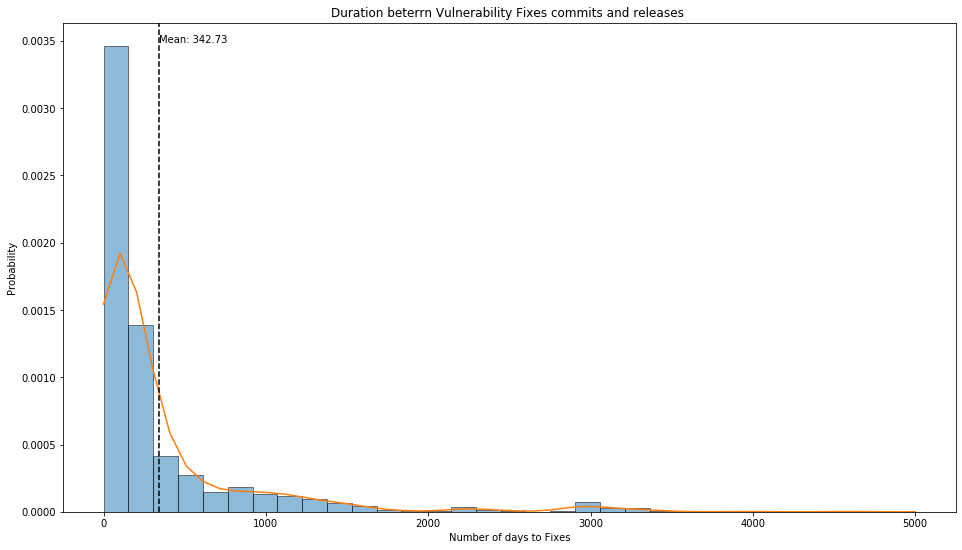

In [287]:
from scipy.stats import kde
from scipy.stats import norm
import scipy.stats as stats

# d = pa.DataFrame({'rel':mg['rel_date'].dt.date,'commit':comt['commit-dates'],'diff':diff})

# d = d[:2000]
t = d[d['diff'].dt.days>-1]['diff'].dt.days

plt.rcParams["figure.figsize"] = [16,9]
m,std = norm.fit(t)
median = t.median()

plt.hist(t, alpha=0.5, bins=30, density=True, ec='black')
xvals = np.linspace(0, 5000)
density = kde.gaussian_kde(t, bw_method=None)
xgrid = np.linspace(xvals.min(), xvals.max(), 100)
plt.plot(xvals, density(xvals))
min_ylim, max_ylim = plt.ylim()
plt.axvline(m, color='black', linestyle='dashed')
plt.text(m, max_ylim*0.96, 'Mean: {:.2f}'.format(m))
plt.title('Duration beterrn Vulnerability Fixes commits and releases ')
plt.xlabel('Number of days to Fixes')
plt.ylabel('Probability')
plt.show()



## Values of Mean, Median, Standerd Deviation

In [269]:
m # Mean Value

379.47185430463577

In [271]:
std # Standerd Devation

623.8384670591051

In [272]:
median # Median

135.0

## Identifing the problem with the Distribution

In general normal distribution there should be atlease some form of bell curve but ranter than seeing we can <br>
observer that the data is more leand to right side. <br>
So there are two possibilitys to go wrong.<br> 1. Data is in correct <br> 2. Wrong selection of stribution.<br>
Some the days values which is a difference between the release date and commit date are negatice <br>
If the days values are ploted then we can see that clearly.

## Visuvalizing the days values.

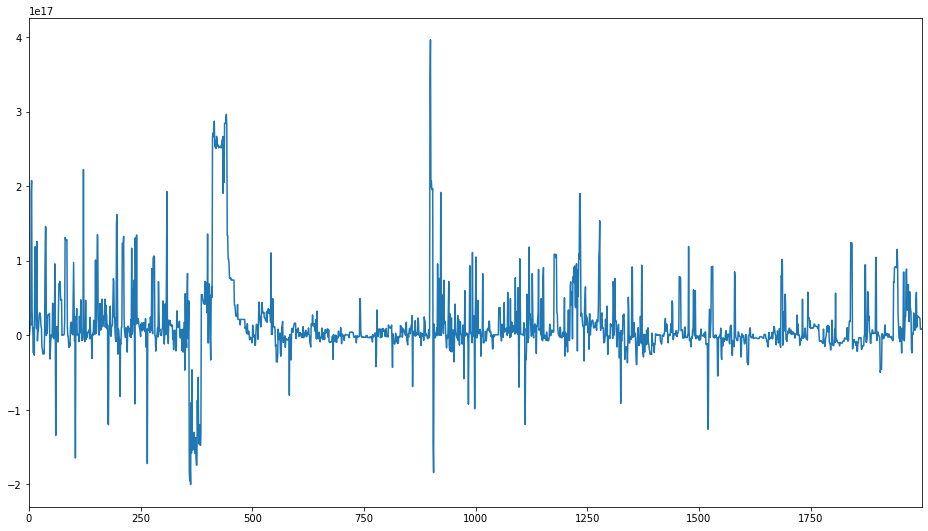

In [111]:
diff[:2000].plot(figsize=(16,9))

## Obeserved negative values

There should not be a negitve days which is not possible in real world<br>


In [274]:
s = pa.DataFrame(diff)
s.columns = ['diff']
s['diff'] = s['diff'].dt.days
s = s[:2000]
# s[s['diff']>-1]

### Ploting only postive values

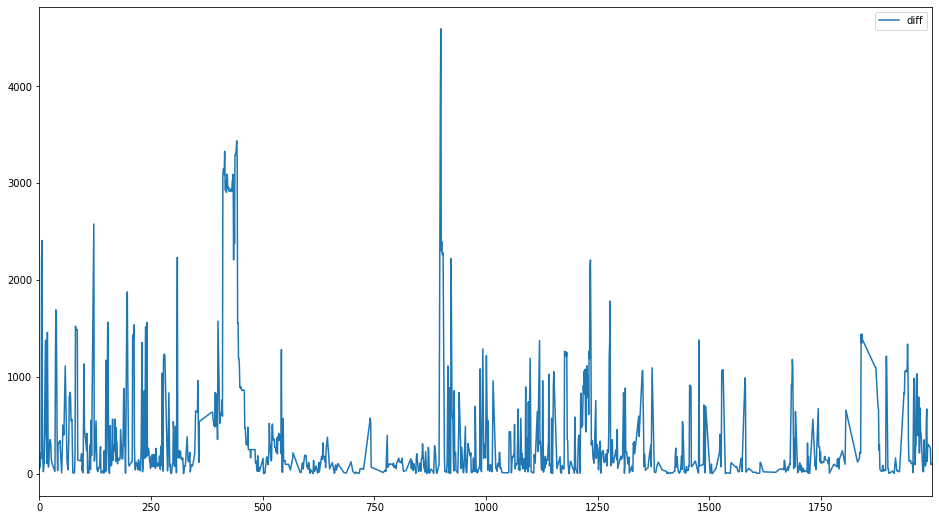

In [149]:
s[s['diff']>-1].plot(figsize=(16,9))

In [280]:
pos = s[s['diff']>-1].count()

In [279]:
neg = s[s['diff']<0].count()

## More than 1/3 of the values are negative

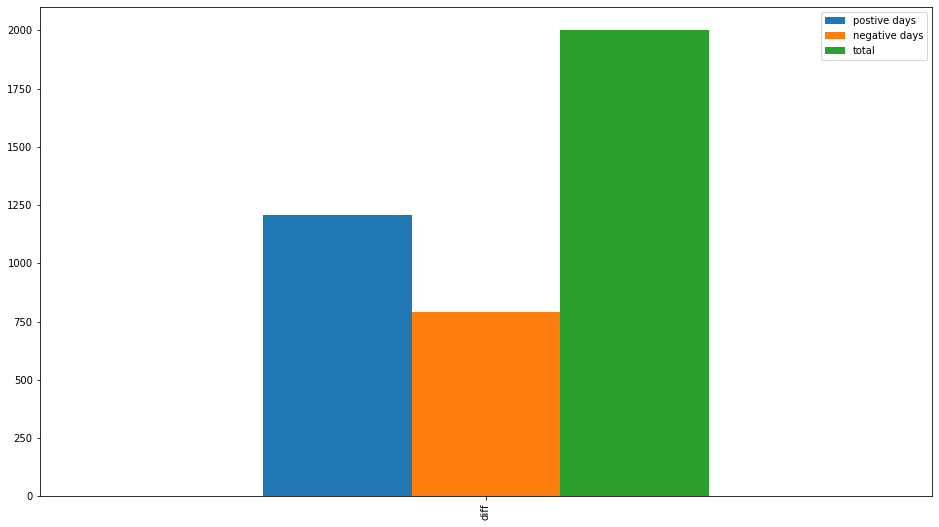

In [284]:
pa.DataFrame({'postive days':pos,'negative days':neg,'total':len(s)}).plot(kind='bar')